# Scraping Data off Twitter Using Python + NLP + Data Visualization
### This is from the [Algovibes Youtube Channel](https://youtu.be/bNDRiaFyLrs)

#import the libraries
import tweepy
import pandas as pd

In [2]:
#Import nlp and graphing libraries
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
## In case you do not have 'en_core_web_lg load it like this
# !python3 -m spacy download en_core_web_lg

In [4]:
# Type in your twiter dev keys if they aren't save in a different file:
#API Key
consumer_key = 'password' 
#API...secret
consumer_secret = 'password'
#access stuff
access_token = 'password'
access_token_secret = 'password'

In [5]:
# Run your developer keys from a different file
%run ./tweepy_passwds.py

In [6]:
# set up authorization access objects
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
# Create cursor object to extract tweets and tweet info
cursor = tweepy.Cursor(api.search, q='bitcoin',tweet_mode='extended').items(1)

In [8]:
# test cursor for 1 tweet
for i in cursor:
    print(i.full_text)

RT @jobcashofficial: ✔️JobCash Airdrop Round 3  is live! 

♦️ Airdrop Reward:  50 JCH [~$2.8] + 18 JCH [~$1] per referral

♦️  Referral Rew…


In [11]:
# Create for loop to grab multiple tweets and save the info you want into lists
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id="mozilla", tweet_mode='extended').items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [12]:
# turn lists into df
df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})
df

,tweets,likes,time
0,RT @publicknowledge: Enrollment for the Emerge...,0,2021-08-26 14:02:04
1,🗣️ Join our Kiswahili Common Voice community! ...,11,2021-08-26 12:12:01
2,"Right now, @ring is collaborating with over 13...",65,2021-08-25 20:16:01
3,Our @reddit_ama is starting now! ▶️ https://t...,11,2021-08-24 16:22:53
4,Have you heard the news? \n\n@Ring has finally...,26,2021-08-23 18:30:08
...,...,...,...
195,What is #NetNeutrality? Why does it matter? An...,46,2021-05-26 15:51:01
196,RT @digitalplanet: On @digitalplanet; The firs...,0,2021-05-26 12:20:22
197,RT @ZDNet: Mozilla expands effort to bring Kis...,0,2021-05-26 09:32:03
198,RT @digitalplanet: Want to have your smart ass...,0,2021-05-26 09:31:31


In [13]:
# delete all ReTweets from df
df = df[~df.tweets.str.contains('RT')]

# reset the index
df = df.reset_index(drop=True)

In [14]:
df

,tweets,likes,time
0,🗣️ Join our Kiswahili Common Voice community! ...,11,2021-08-26 12:12:01
1,"Right now, @ring is collaborating with over 13...",65,2021-08-25 20:16:01
2,Our @reddit_ama is starting now! ▶️ https://t...,11,2021-08-24 16:22:53
3,Have you heard the news? \n\n@Ring has finally...,26,2021-08-23 18:30:08
4,Within a few swipes 📲 you're potentially cutti...,33,2021-08-22 16:07:02
...,...,...,...
178,Speech recognition is revolutionizing our rela...,34,2021-05-27 14:47:03
179,📺 Tune in for @msurman's keynote presentation ...,10,2021-05-27 11:29:00
180,Mozilla's @chenaichair on @digitalplanet discu...,29,2021-05-26 20:48:03
181,What is #NetNeutrality? Why does it matter? An...,46,2021-05-26 15:51:01


In [15]:
# create df of "most liked" tweets from yor data set
mostlike = df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time
42,Facebook claims they shut down the researchers...,529,2021-08-04 19:00:01
99,Are your @YouTube recommendations sometimes li...,375,2021-07-07 09:05:41
155,Today's the day @amazon begins automatically o...,160,2021-06-08 17:35:51
166,Tell me it’s a political ad without telling me...,120,2021-06-03 19:35:02
10,We’re glad to see Amazon was fined a record-br...,101,2021-08-19 14:14:29


In [16]:
# create a list of all words from each tweet using .split()
list_of_sentences = [sentence for sentence in df.tweets]
lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)
lines[0:3]

['🗣️', 'Join', 'our']

In [17]:
# create second list that excludes all non letters or numbers

lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [18]:
# Reduce each word to it's stem for a more specific word count
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [19]:
# get rid of all stop words
stem2  = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)


In [20]:
#save df2 to the count of each individual word
df2 = pd.DataFrame(stem2)

df2 = df2[0].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


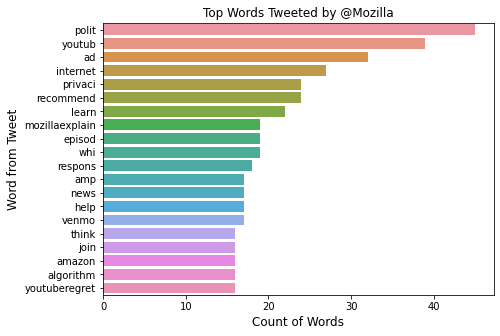

In [33]:
# create "top words tweeted"
df2 = df2[:20]
plt.figure(figsize=(7,5))
sns.barplot(df2.values, df2.index,alpha=1)
plt.title('Top Words Tweeted by @Mozilla')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [22]:
# Use spaCy to break things into Organizations to show Top Organizations 

str1 = " " #create 1 space string
stem2 = str1.join(lines2) #join all destemmed words together into one long sentence

stem2 = nlp(stem2) 

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


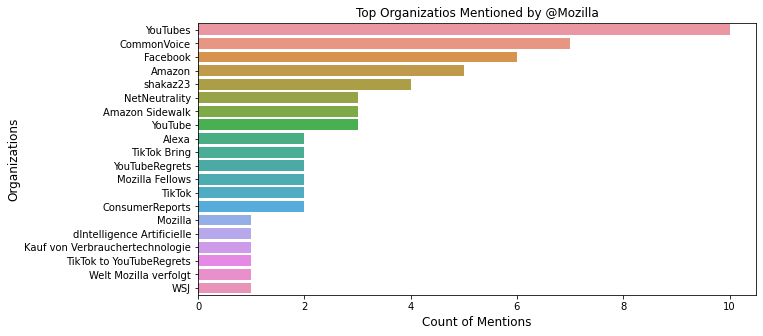

In [30]:
# create Top Organizaitons Graph

dfx = df7[:20]
plt.figure(figsize=(10,5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organizatios Mentioned by @Mozilla')
plt.ylabel('Organizations', fontsize=12)
plt.xlabel('Count of Mentions',fontsize=12)
plt.show()

In [23]:
# Grab all people for people word count:
df8 = df6.where(df6['Entity'] == 'PERSON')
df9 = df8['Word'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count of Mentions')

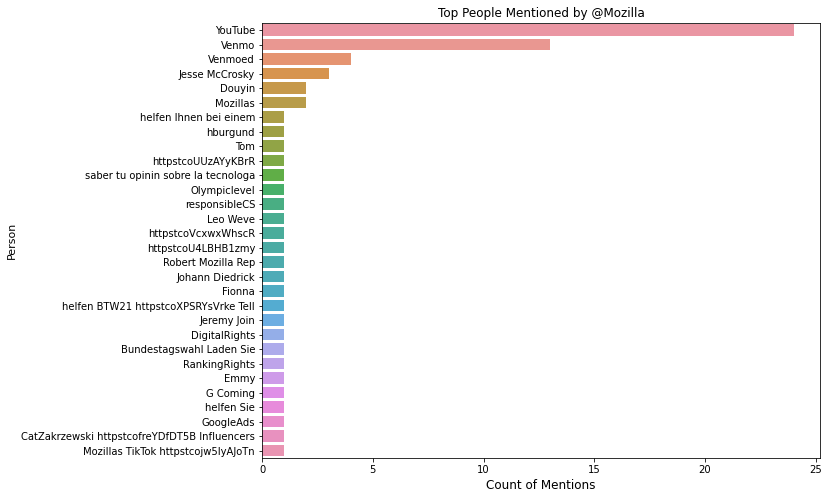

In [29]:

plt.figure(figsize=(10,10))
sns.barplot(df9.values, df9.index, alpha=1)
plt.title('Top People Mentioned by @Mozilla', fontsize=12)
plt.ylabel('Person', fontsize=12)
plt.xlabel('Count of Mentions', fontsize=12)